# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
1. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
1. Опишите результаты 

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('myNba.csv')

In [2]:
df.head()

,Unnamed: 0,Unnamed: 0.1,full_name,rating,jersey,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,weightLog
0,0,0,LeBron James,97,#23,F,12/30/84,2.06,113.4,37436858,USA,2003,1,1,4.730921
1,1,1,Kawhi Leonard,97,#2,F,06/29/91,2.01,102.1,32742000,USA,2011,1,15,4.625953
2,2,2,Giannis Antetokounmpo,97,#34,F-G,12/06/94,2.11,109.8,25842697,Greece,2013,1,15,4.698661
3,3,3,Kevin Durant,97,#7,F,09/29/88,2.08,104.3,37199000,USA,2007,1,2,4.647271
4,4,4,James Harden,97,#13,G,08/26/89,1.96,99.8,38199000,USA,2009,1,3,4.603168


In [3]:
x = df[['height', 'weight', 'salary']]

In [4]:
x.head()

,height,weight,salary
0,2.06,113.4,37436858
1,2.01,102.1,32742000
2,2.11,109.8,25842697
3,2.08,104.3,37199000
4,1.96,99.8,38199000


In [5]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) 
# z = (x - u) / s 
# u - mean 
# s - standard deviation  

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [7]:
y = df.rating

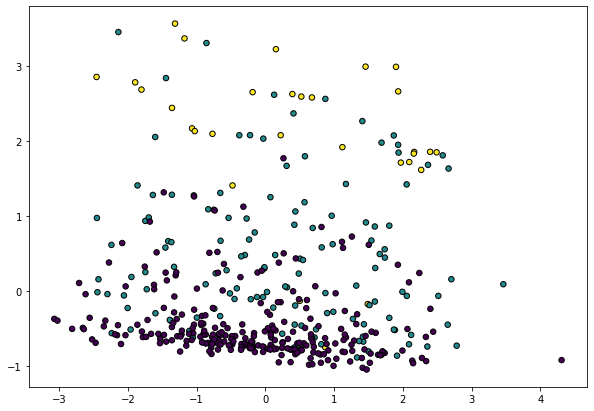

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=30, edgecolor="k")
plt.show()

In [9]:
x_arr = x_pca

In [10]:
from sklearn.cluster import KMeans
random_state = 170

In [11]:
model = KMeans(n_clusters=3)

In [12]:
model.fit(x_arr)

KMeans(n_clusters=3)

In [13]:
all_predictions = model.predict(x_arr)

In [14]:
all_predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0,
       2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,

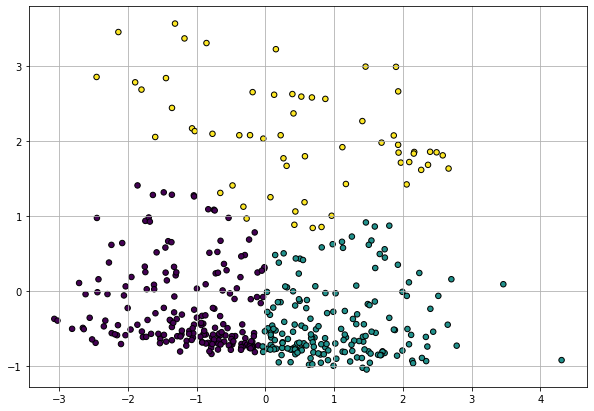

In [15]:
plt.figure(figsize=(10,7))
plt.grid()
plt.scatter(x_arr[:, 0], x_arr[:, 1], c=all_predictions, s=30, edgecolor="k")
plt.show()

In [16]:
import math

In [17]:
n0 = list(filter(lambda x: x == 0, all_predictions)).count(0)

In [18]:
n1 = list(filter(lambda x: x == 1, all_predictions)).count(1)

In [19]:
n2 = list(filter(lambda x: x == 2, all_predictions)).count(2)

In [20]:
n = n1 + n2 + n0

In [21]:
arr0= []
arr1= []
arr2= []

In [22]:
x_arr[0]

array([1.90117434, 2.99155971])

In [23]:
for i in range (n):
    if (all_predictions[i] == 0):
        arr0.append((x_arr[i]))
    elif (all_predictions[i] == 1):
        arr1.append((x_arr[i]))
    else:
        arr2.append((x_arr[i]))
        

In [24]:
v0 = 0
sum0 = 0
k0 = n0 * (n0 - 1) / 2 

sum1 = 0
v1 = 0
k1 = n1 * (n1 - 1) / 2 

sum2 = 0
v2 = 0
k2 = n2 * (n2 - 1) / 2 

In [25]:
for i in range (n0):
    for j in range (i):
        sum0 = sum0 + math.hypot(arr0[i][0] - arr0[j][0] , arr0[i][1] - arr0[j][1])

In [26]:
for i in range (n1):
    for j in range (i):
        sum1 = sum1 + math.hypot(arr1[i][0] - arr1[j][0] , arr1[i][1] - arr1[j][1])

In [27]:
for i in range (n2):
    for j in range (i):
        sum2 = sum2 + math.hypot(arr2[i][0] - arr2[j][0] , arr2[i][1] - arr2[j][1])

In [28]:
v0 = sum0 / k0
v1 = sum1 / k1
v2 = sum2 / k2

In [29]:
k012 = n0 * n1 + n0 * n2 + n1 * n2

In [30]:
sum012 = 0

In [31]:
for i in range (n0):
    for j in range (n1):
        sum012 = sum012 + math.hypot(arr0[i][0] - arr1[j][0] , arr0[i][1] - arr1[j][1])

In [32]:
for i in range (n0):
    for j in range (n2):
        sum012 = sum012 + math.hypot(arr0[i][0] - arr2[j][0] , arr0[i][1] - arr2[j][1])

In [33]:
for i in range (n1):
    for j in range (n2):
        sum012 = sum012 + math.hypot(arr1[i][0] - arr2[j][0] , arr1[i][1] - arr2[j][1])

In [34]:
v123 = sum012 / k012

In [35]:
print (v0, v1, v2, v123)

1.1236411648251807 1.0955074494614938 1.8873758518664778 2.5804794542497937
